In [3]:
#zad1 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


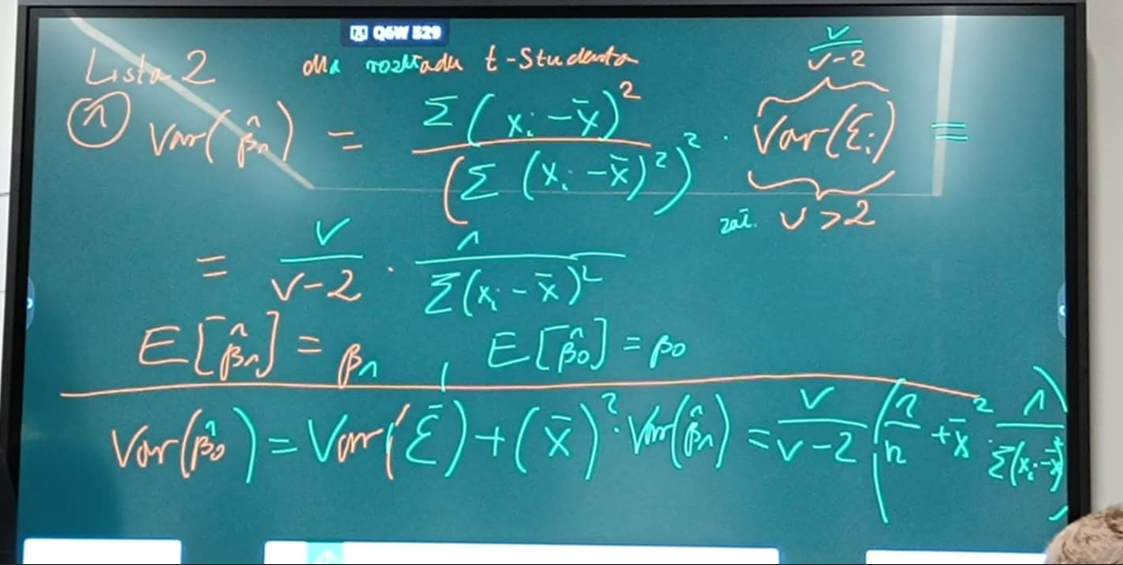

In [4]:
def b1_estim(x,y):
    return np.sum((x - np.mean(x)) * (y))/np.sum((x-np.mean(x))**2)

def b0_estim(x,y):
    return np.mean(y) - b1_estim(x,y) * np.mean(x)

In [5]:
x = np.linspace(0,10,1000)
n = 1000
b0 = 7
b1 = 3

In [14]:
#rozkład t-studenta zmiennych e

mc = 5000
nis = np.linspace(4,100,18)
def estymacja_mc_ni(mc, n, nis, b0, b1):
    b0s, b1s = [], []
    b0s_teo_var, b1s_teo_var = [], []
    for nis_ in nis:
        b0_mc, b1_mc = [], []
        for i in range(mc):
            blad = stats.t.rvs(nis_, loc=0, scale=1, size=n)
            ys = b0 + b1*x + blad
            b0_e, b1_e = b0_estim(x,ys), b1_estim(x,ys)
            b0_mc.append(b0_e)
            b1_mc.append(b1_e)
        b0s_teo_var.append(((1/n)+((np.mean(x)**2)/np.sum((x-np.mean(x))**2)))*(nis_/(nis_-2))) #wzór z tablicy na wartość teoretyczną Var(b0_est)
        b1s_teo_var.append((1/np.sum((x-np.mean(x))**2))*(nis_/(nis_-2))) #wzór z tablicy na wartość teoretyczną Var(b1_est)
        b0s.append(b0_mc)
        b1s.append(b1_mc)
    b0_mean = [np.mean(b0_) for b0_ in b0s]
    b1_mean = [np.mean(b1_) for b1_ in b1s]
    b0_var_emp= [np.var(b0_) for b0_ in b0s]
    b1_var_emp = [np.var(b1_) for b1_ in b1s]
    return b0_mean, b1_mean, b0_var_emp, b1_var_emp, b0s_teo_var, b1s_teo_var

In [15]:
b0_mean, b1_mean, b0_var, b1_var,b0s_teo_var, b1s_teo_var = estymacja_mc_ni(mc, n, nis, b0, b1)

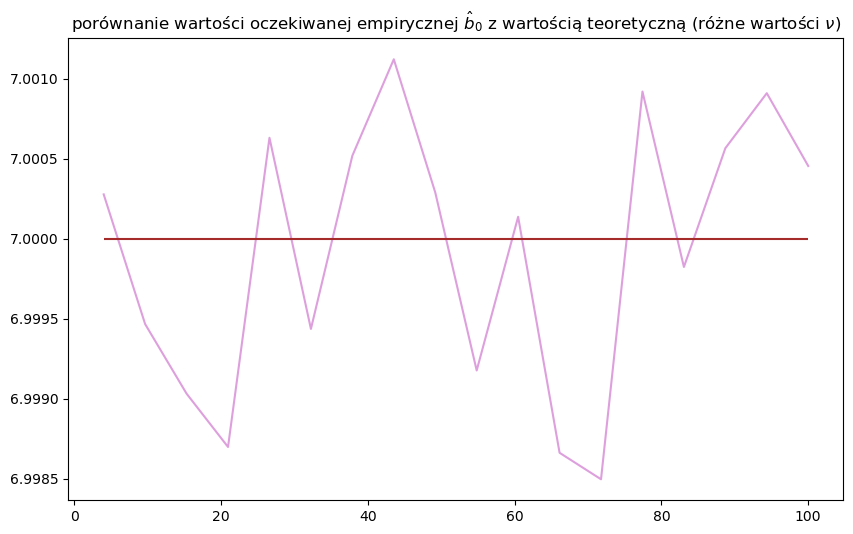

In [40]:
plt.figure(figsize=(10,6))
plt.plot(nis, b0_mean, color="plum")
plt.title("porównanie wartości oczekiwanej empirycznej $\hat{b}_0$ z wartością teoretyczną (różne wartości $\\nu$)")
plt.hlines(b0,4,100, color="brown")
plt.show()

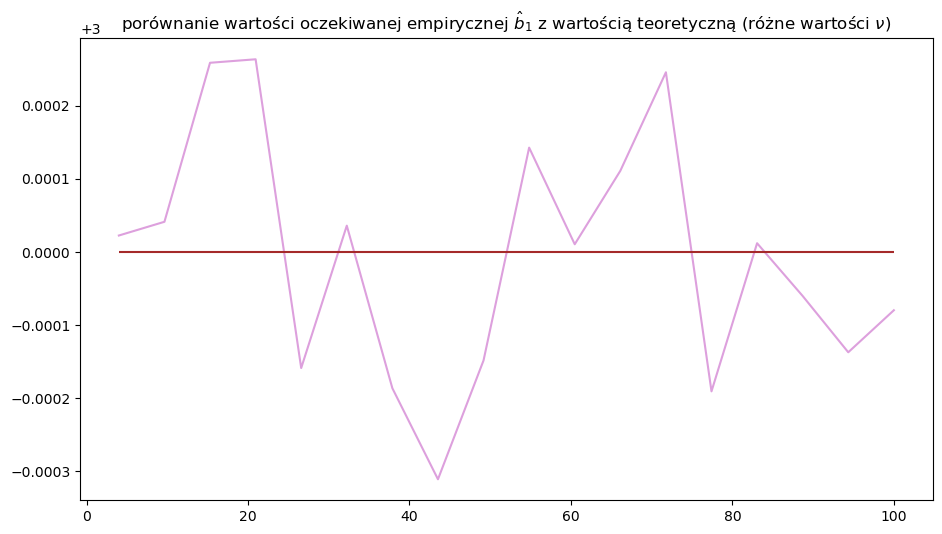

In [41]:
plt.figure(figsize=(11,6))
plt.plot(nis, b1_mean, color="plum")
plt.title("porównanie wartości oczekiwanej empirycznej $\hat{b}_1$ z wartością teoretyczną (różne wartości $\\nu$)")
plt.hlines(b1,4,100, color="brown")
plt.show()

[]

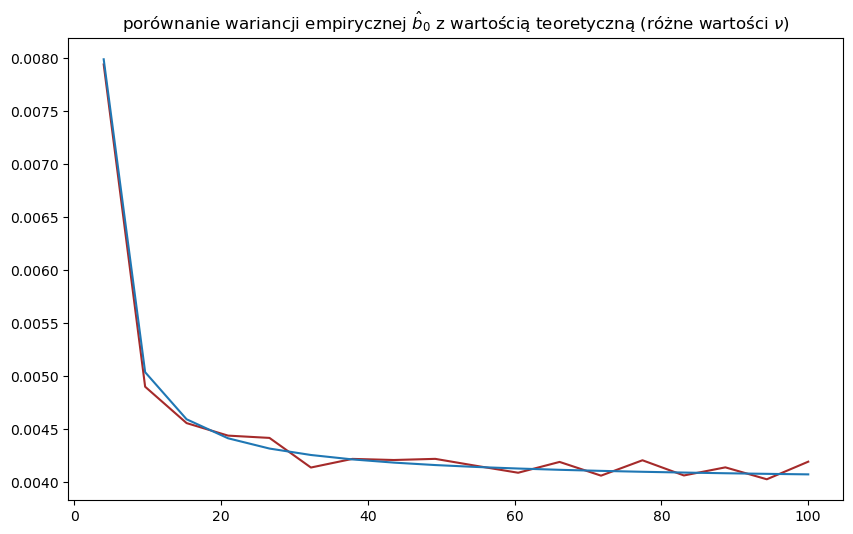

In [36]:
plt.figure(figsize=(10,6))
plt.title("porównanie wariancji empirycznej $\hat{b}_0$ z wartością teoretyczną (różne wartości $\\nu$)")
plt.plot(nis, b0_var, color="brown")
plt.plot(nis, b0s_teo_var)
plt.plot()

[]

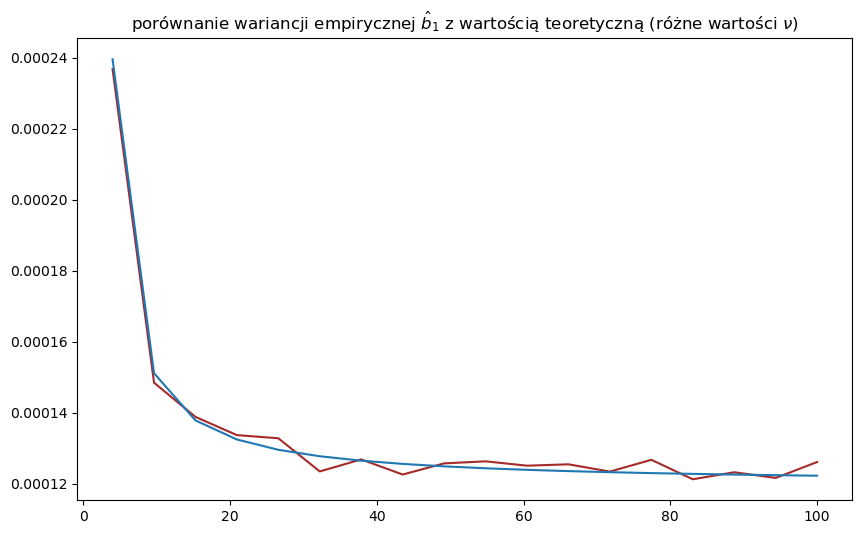

In [42]:
plt.figure(figsize=(10,6))
plt.title("porównanie wariancji empirycznej $\hat{b}_1$ z wartością teoretyczną (różne wartości $\\nu$)")
plt.plot(nis, b1_var, color="brown")
plt.plot(nis, b1s_teo_var)
plt.plot()

In [46]:
ni = 4

In [47]:
mc = 5000
ns = np.linspace(100,1000,18)
def estymacja_mc_n(mc, ns, ni, b0, b1):
    b0s, b1s = [], []
    b0s_teo_var, b1s_teo_var = [], []
    for n in ns:
        b0_mc, b1_mc = [], []
        for i in range(mc):
            x = np.linspace(0,10,int(n))
            blad = stats.t.rvs(ni, loc=0, scale=1, size=int(n))
            ys = b0 + b1*x + blad
            b0_e, b1_e = b0_estim(x,ys), b1_estim(x,ys)
            b0_mc.append(b0_e)
            b1_mc.append(b1_e)
        b0s_teo_var.append((1/n + np.mean(x)**2/np.sum((x-np.mean(x))**2))*(ni/(ni-2)))
        b1s_teo_var.append((1/np.sum((x-np.mean(x))**2))*(ni/(ni-2)))
        b0s.append(b0_mc)
        b1s.append(b1_mc)
    b0_mean = [np.mean(b0_) for b0_ in b0s]
    b1_mean = [np.mean(b1_) for b1_ in b1s]
    b0_var = [np.var(b0_) for b0_ in b0s]
    b1_var = [np.var(b1_) for b1_ in b1s]
    return b0_mean, b1_mean, b0_var, b1_var, b0s_teo_var, b1s_teo_var

In [48]:
b0_mean, b1_mean, b0_var, b1_var, b0s_teo_var, b1s_teo_var = estymacja_mc_n(mc, ns, ni, b0, b1)

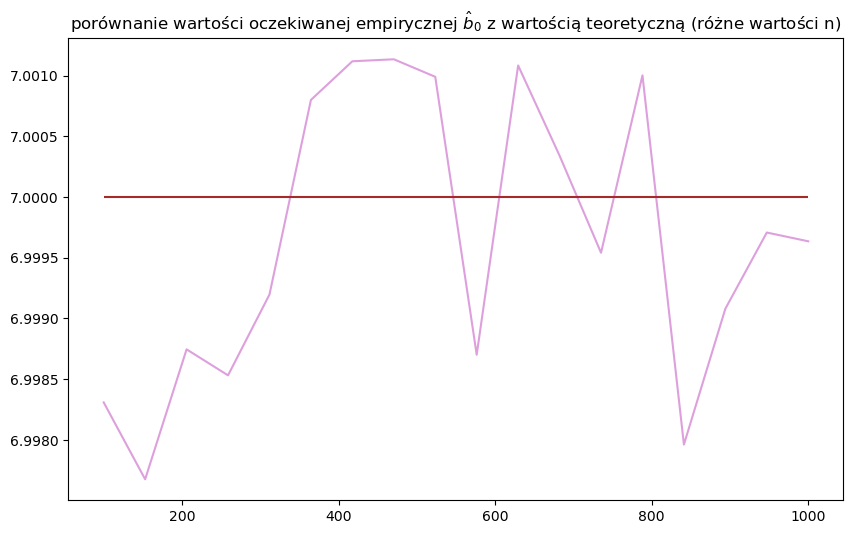

In [51]:
plt.figure(figsize=(10,6))
plt.plot(ns, b0_mean, color="plum")
plt.title("porównanie wartości oczekiwanej empirycznej $\hat{b}_0$ z wartością teoretyczną (różne wartości n)")
plt.hlines(b0,100,1000, color="brown")
plt.show()


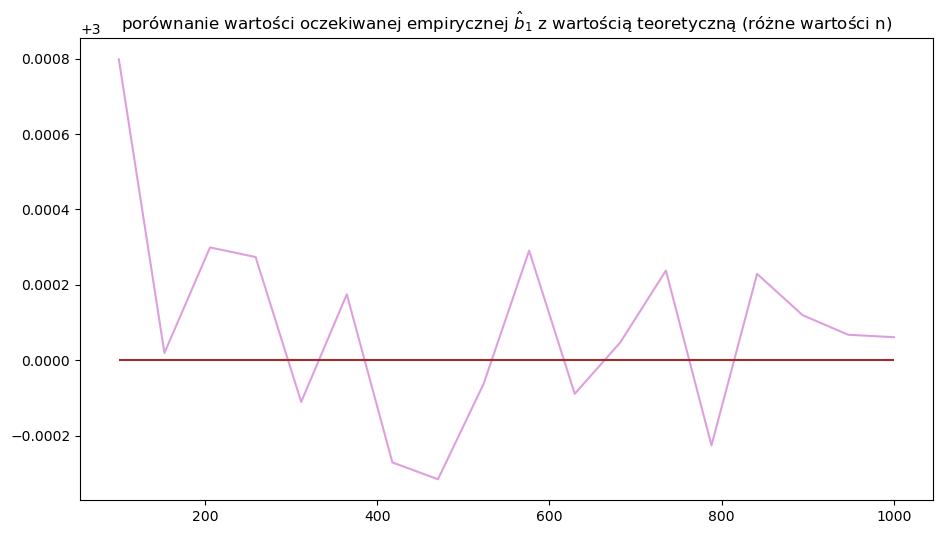

In [53]:
plt.figure(figsize=(11,6))
plt.plot(ns, b1_mean, color="plum")
plt.title("porównanie wartości oczekiwanej empirycznej $\hat{b}_1$ z wartością teoretyczną (różne wartości n)")
plt.hlines(b1,100,1000, color="brown")
plt.show()

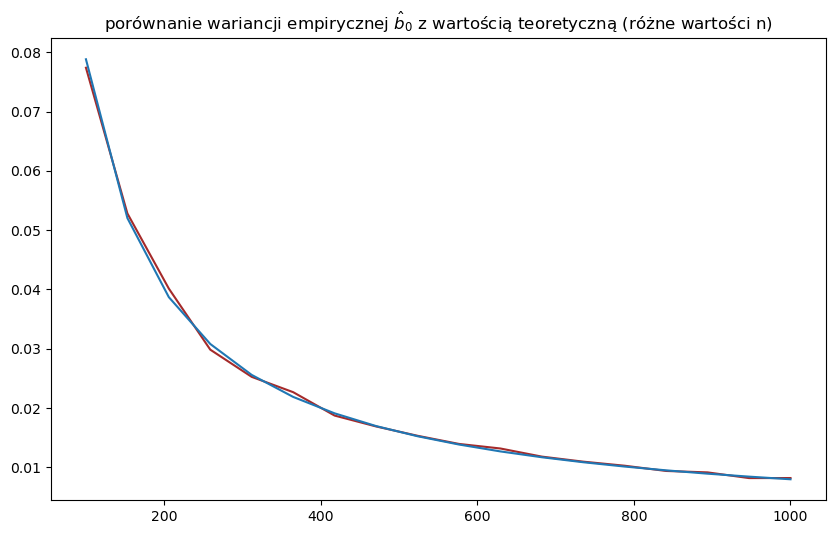

In [56]:
plt.figure(figsize=(10,6))
plt.title("porównanie wariancji empirycznej $\hat{b}_0$ z wartością teoretyczną (różne wartości n)")
plt.plot(ns, b0_var, color="brown")
plt.plot(ns, b0s_teo_var)
plt.show()

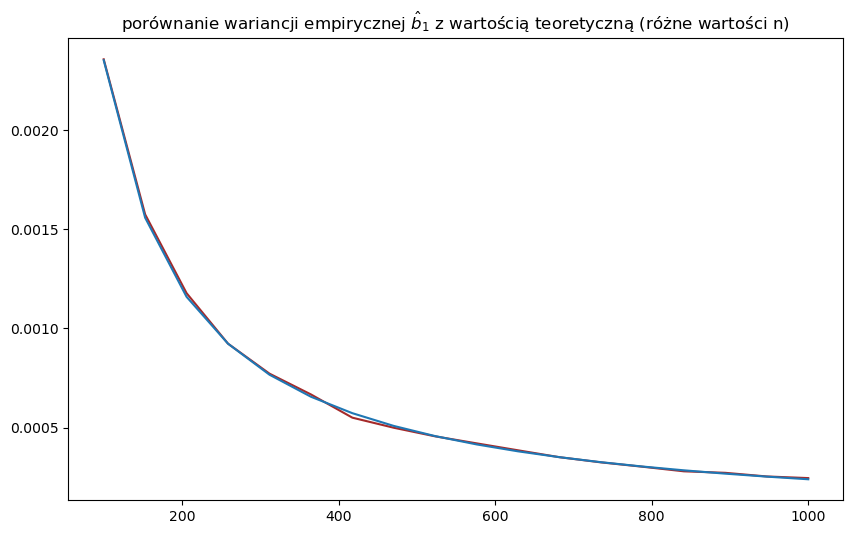

In [57]:
plt.figure(figsize=(10,6))
plt.title("porównanie wariancji empirycznej $\hat{b}_1$ z wartością teoretyczną (różne wartości n)")
plt.plot(ns, b1_var, color="brown")
plt.plot(ns, b1s_teo_var)
plt.show()

In [58]:
#rozkład normalny zmiennych e

mc = 5000
sigmas = np.linspace(1,50,50)
def estymacja_mc_normal_sigma(mc, n, sigmas, b0, b1):
    b0s, b1s = [], []
    b0s_teo_var, b1s_teo_var = [], []
    for sigma in sigmas:
        b0_mc, b1_mc = [], []
        for i in range(mc):
            blad = np.random.normal(0,sigma, n)
            ys = b0 + b1*x + blad
            b0_e, b1_e = b0_estim(x,ys), b1_estim(x,ys)
            b0_mc.append(b0_e)
            b1_mc.append(b1_e)
        b0s_teo_var.append(((1/n)+((np.mean(x)**2)/np.sum((x-np.mean(x))**2)))*(sigma**2))
        b1s_teo_var.append((1/np.sum((x-np.mean(x))**2))*(sigma**2))
        b0s.append(b0_mc)
        b1s.append(b1_mc)
    b0_mean = [np.mean(b0_) for b0_ in b0s]
    b1_mean = [np.mean(b1_) for b1_ in b1s]
    b0_var = [np.var(b0_) for b0_ in b0s]
    b1_var = [np.var(b1_) for b1_ in b1s]
    return b0_mean, b1_mean, b0_var, b1_var, b0s_teo_var, b1s_teo_var

In [59]:
b0_mean, b1_mean, b0_var, b1_var, b0s_teo_var, b1s_teo_var = estymacja_mc_normal_sigma(mc, n, sigmas, b0, b1)

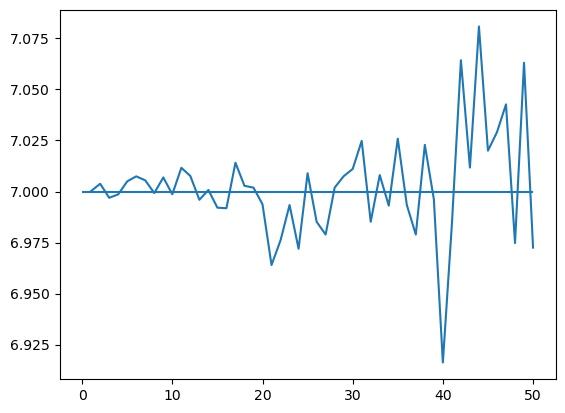

In [60]:
plt.figure()
plt.plot(sigmas, b0_mean)
plt.hlines(b0, 0,50)
plt.show()